In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("C:\\Users\\Smit Rachh\\Downloads\\online+retail\\Online Retail.xlsx")

In [3]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [8]:
# Check for missing values
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [10]:
#Drop rows with missing values (common for CustomerID or Description in this dataset)
df = df.dropna(subset=['CustomerID', 'Description'])

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()


In [14]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert 'Quantity' and 'UnitPrice' to numeric (if not already)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')


In [16]:
# Remove negative quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [18]:
# Create a new column 'TotalPrice' for total cost per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [20]:
# Standardize text data
df['Description'] = df['Description'].str.lower().str.strip()


In [22]:
# Display summary of the cleaned data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26

EDA


In [25]:
# Basic statistical summary of numerical columns
numeric_columns = ['Quantity', 'UnitPrice', 'TotalPrice']

# Calculate mean, median, mode, and standard deviation for numerical columns
mean_values = df[numeric_columns].mean()
median_values = df[numeric_columns].median()
mode_values = df[numeric_columns].mode().iloc[0]
std_dev_values = df[numeric_columns].std()

# Display the calculated statistics
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation Values:\n", std_dev_values)


Mean Values:
 Quantity      13.119702
UnitPrice      3.125914
TotalPrice    22.631500
dtype: float64

Median Values:
 Quantity       6.00
UnitPrice      1.95
TotalPrice    12.45
dtype: float64

Mode Values:
 Quantity       1.00
UnitPrice      1.25
TotalPrice    15.00
Name: 0, dtype: float64

Standard Deviation Values:
 Quantity      180.492832
UnitPrice      22.241836
TotalPrice    311.099224
dtype: float64


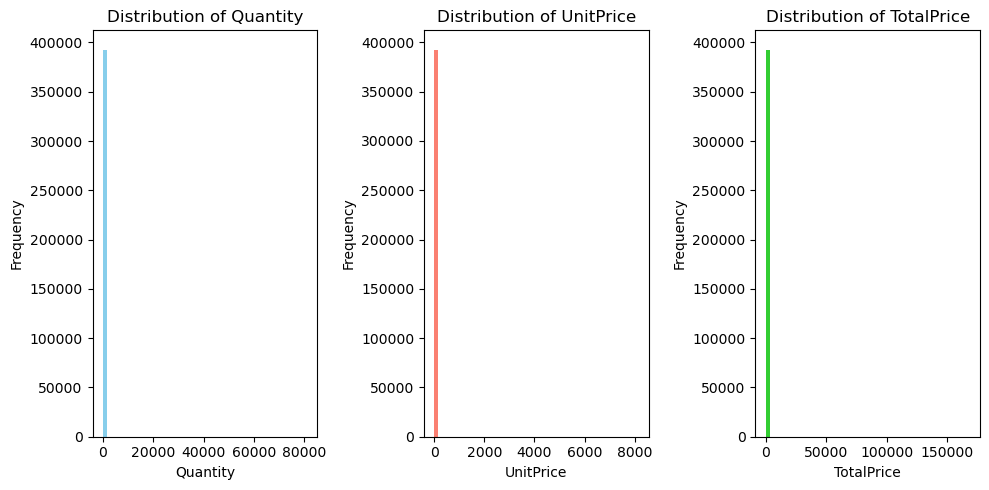

In [33]:
# Plot histograms for Quantity, UnitPrice, and TotalPrice
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Quantity'], bins=50, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['UnitPrice'], bins=50, color='salmon')
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['TotalPrice'], bins=50, color='limegreen')
plt.title('Distribution of TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

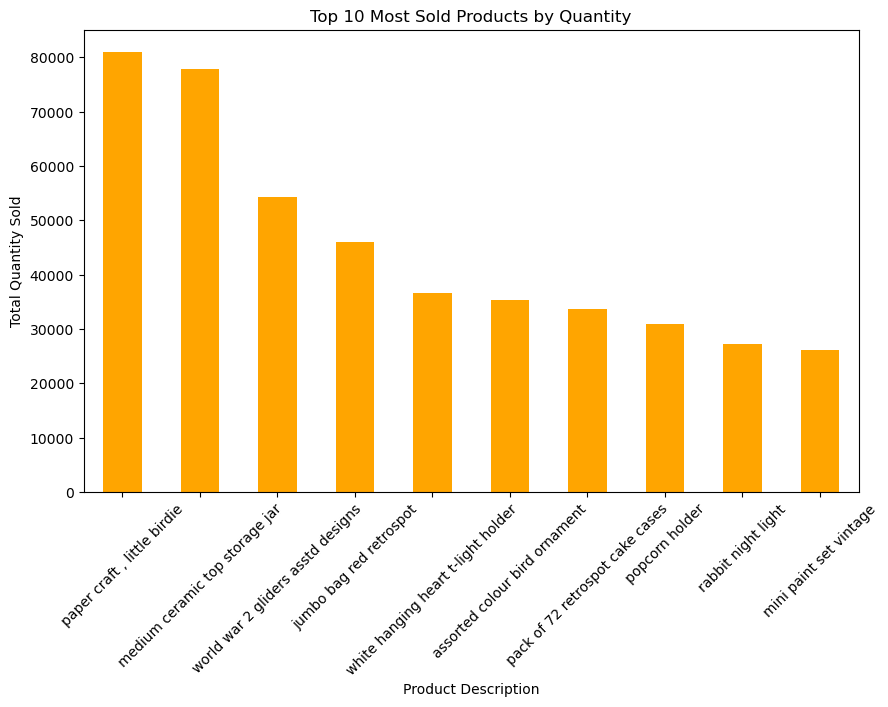

In [35]:
# Top 10 most sold products by Quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Most Sold Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


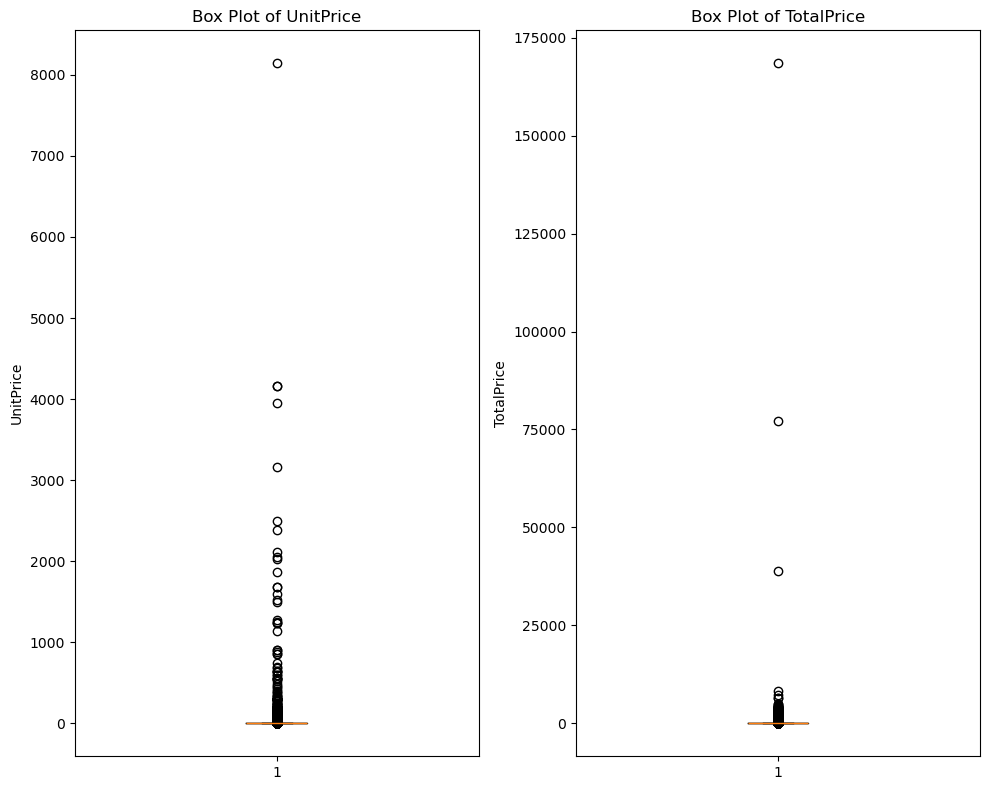

In [43]:
# Box plot for UnitPrice and TotalPrice
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.boxplot(df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.ylabel('UnitPrice')

plt.subplot(1, 2, 2)
plt.boxplot(df['TotalPrice'])
plt.title('Box Plot of TotalPrice')
plt.ylabel('TotalPrice')

plt.tight_layout()
plt.show()


In [45]:
#Customer Segmentation Using RFM Analysis
# Set the current date for Recency calculation
current_date = df['InvoiceDate'].max()

# Calculate RFM metrics for each customer
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                    # Frequency
    'TotalPrice': 'sum'                                      # Monetary
}).reset_index()

# Rename columns to RFM names
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display the first few rows of RFM DataFrame
print(rfm_df.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        1        182   4310.00
2     12348.0       74         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      309         17    334.40


In [47]:
# Assign scores for Recency, Frequency, and Monetary
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores to form an overall RFM score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the first few rows with RFM scores
print(rfm_df.head())


   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0     12346.0      325          1  77183.60       1       1       5       115
1     12347.0        1        182   4310.00       5       5       5       555
2     12348.0       74         31   1797.24       2       3       4       234
3     12349.0       18         73   1757.55       4       4       4       444
4     12350.0      309         17    334.40       1       2       2       122


In [49]:
# Define customer segments
def rfm_segment(x):
    if x == '555':
        return 'Best Customers'
    elif x[0] == '5':
        return 'Loyal Customers'
    elif x[1] == '5':
        return 'Frequent Customers'
    elif x[2] == '5':
        return 'High Spenders'
    elif x == '111':
        return 'Low Value'
    else:
        return 'Other'

# Apply segmentation
rfm_df['Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

# Display the customer segments
print(rfm_df.groupby('Segment').size())


Segment
Best Customers         309
Frequent Customers     465
High Spenders          175
Low Value              256
Loyal Customers        559
Other                 2574
dtype: int64


In [51]:

#Customer Lifetime Value (CLV) Analysi
# Calculate average order value
rfm_df['AverageOrderValue'] = rfm_df['Monetary'] / rfm_df['Frequency']

# Calculate purchase frequency
purchase_frequency = sum(rfm_df['Frequency']) / rfm_df.shape[0]

# Calculate repeat rate and churn rate
repeat_rate = rfm_df[rfm_df['Frequency'] > 1].shape[0] / rfm_df.shape[0]
churn_rate = 1 - repeat_rate

# Display calculated values
print(f"Average Order Value: {rfm_df['AverageOrderValue'].mean()}")
print(f"Purchase Frequency: {purchase_frequency}")
print(f"Repeat Rate: {repeat_rate}, Churn Rate: {churn_rate}")

# Profit Margin (assuming 10% profit margin for simplicity)
profit_margin = 0.10

# Calculate CLV
rfm_df['CLV'] = rfm_df['AverageOrderValue'] * purchase_frequency / churn_rate * profit_margin

# Display top customers by CLV
print(rfm_df[['CustomerID', 'CLV']].sort_values(by='CLV', ascending=False).head(10))



Average Order Value: 68.38158951287828
Purchase Frequency: 90.52374366067312
Repeat Rate: 0.9836330106039649, Churn Rate: 0.016366989396035092
      CustomerID           CLV
0        12346.0  4.268927e+07
3008     16446.0  3.106000e+07
2011     15098.0  7.359103e+06
2502     15749.0  2.463136e+06
2087     15195.0  2.135470e+06
597      13135.0  1.712358e+06
4013     17846.0  1.124482e+06
4191     18087.0  1.121584e+06
3071     16532.0  9.331689e+05
2678     16000.0  7.616443e+05


In [53]:
# Churn Prediction
# Define churn based on recency > 180 days
rfm_df['Churn'] = np.where(rfm_df['Recency'] > 180, 1, 0)

# Prepare data for modeling
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['Churn']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [55]:
# Import Logistic Regression and fit the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict churn on test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1054    0]
 [   0  248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1054
           1       1.00      1.00      1.00       248

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



In [97]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Sample a larger subset of the data (e.g., 10% of the total data)
df_sample = df.sample(frac=0.10, random_state=42)

# Convert data to a format suitable for the FP-Growth algorithm
basket_sample = (df_sample.groupby(['InvoiceNo', 'Description'])['Quantity']
                 .sum().unstack().reset_index().fillna(0)
                 .set_index('InvoiceNo'))

# Convert quantities to 0 or 1 using DataFrame.apply() with lambda function, then convert to boolean
basket_sample = basket_sample.apply(lambda x: x > 0).astype(bool)

# Apply the FP-Growth algorithm with a lower min_support to capture more itemsets
frequent_itemsets_fp = fpgrowth(basket_sample, min_support=0.005, use_colnames=True)

# Use a lower min_threshold for confidence to generate more rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.3)

# Display the generated association rules
print(frequent_itemsets_fp.head())
print(rules_fp.head())


    support                             itemsets
0  0.006960  (wooden picture frame white finish)
1  0.005955   (red hanging heart t-light holder)
2  0.005413           (home building block word)
3  0.005723             (jumbo storage bag suki)
4  0.008197    (pack of 72 retrospot cake cases)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
